<b>This project focuses on bitcoin returns data from January 2, 2014 to January 1, 2018. The purpose of this task is to estimate the autocorrelation in daily Bitcoin returns. The estimate later re-estimates the regression 1000 times and calculates the fractions of coefficients larger than the univariate regression. 

In [39]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [40]:
def reg_m(y, x):
    X = np.hstack((np.ones((len(x),1)), x))     # adds column of ones to X
    results = sm.OLS(y, X).fit()                # creates object containing regression results
    return results

In [41]:
b_names = np.array(['yyyymmdd', 'ret'])

b = np.genfromtxt('/Users/jealvarado/Desktop/Github/Python/BitcoinAutocorrelation/Bitcoin_Daily_Close.csv', delimiter=',')
b = b[1:,:]                   # removes variable names

ret = b[:, b_names=='ret']    # extracts returns
print(ret)


[[ 0.04017371]
 [ 0.0203517 ]
 [ 0.04982167]
 ...
 [-0.11626479]
 [ 0.09297262]
 [-0.0352632 ]]


In [42]:
y = ret[1:]
x = ret[:-1]
print(y)

[[ 0.0203517 ]
 [ 0.04982167]
 [ 0.08611884]
 ...
 [-0.11626479]
 [ 0.09297262]
 [-0.0352632 ]]


In [43]:
reg_m(y,x).summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.001
Method:                 Least Squares   F-statistic:                    0.1056
Date:                Sun, 02 Jan 2022   Prob (F-statistic):              0.745
Time:                        21:45:04   Log-Likelihood:                 2677.0
No. Observations:                1460   AIC:                            -5350.
Df Residuals:                    1458   BIC:                            -5339.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0027      0.001      2.628      0.009       0.001       0.005
x1             0.0085      0.026      0.325      0.745      -0.043       0.060
==============================================================================
Omnibus:                      211.048   Durbin-Watson:                   1.998
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2733.066
Skew:                           0.122   Prob(JB):                         0.00
Kurtosis:                       9.698   Cond. No.                         25.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [44]:
my_rho = reg_m(y, x).params[1]
print(my_rho)

0.008508493615059995


In [45]:
x_copy = x.copy()
rho = np.empty((10000,1))
for g in range(10000):
    np.random.shuffle(x_copy)
    rho[g] = reg_m(y, x_copy).params[1]    

In [46]:
print(np.mean(np.where(np.abs(rho)>my_rho,1,0)))     # around 75% of the estimates are as large in absolute value

0.7375


In [47]:
print(np.mean(np.where(rho>my_rho,1,0)))             # around 36% are strictly larger

0.3635


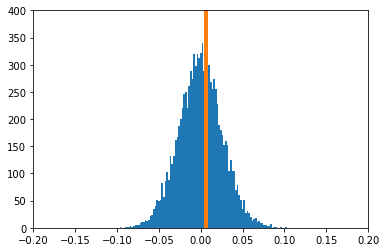

In [48]:
rho2 = np.full((10000,1),my_rho)
plt.hist(rho, bins=100)
plt.hist(rho2, bins=250)
plt.xlim((-0.2,0.2))
plt.ylim((0,400))
plt.show()